# VGG19 ARCHITECTURE

In [74]:
#Importing necessary libraries 
import os, shutil
import random
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm, tqdm_notebook
import cv2
from scipy import stats
from sklearn.metrics import confusion_matrix, roc_curve,auc, classification_report, precision_score, recall_score
from sklearn.linear_model import LinearRegression

import skimage
import skimage.segmentation
import copy

# Importing Libraries for Data Visualization part (Plotting of graphs and HeatMaps)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from glob import glob
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Flatten, Dense, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.imagenet_utils import decode_predictions

2.4.1


In [75]:
# Creating and Defining necessary variable to store training dataset for both classes i.e 1. Parasitic 2. Uninfected

tr_inf = glob('Dataset/Train/Parasite/*')
tr_he = glob('Dataset/Train/Uninfected/*')

In [76]:
# Taking random 10 samples from each of the 2 classes for displaying part
infected_trn_samples = random.sample(tr_inf, 10)
healthy_trn_samples = random.sample(tr_he, 10)

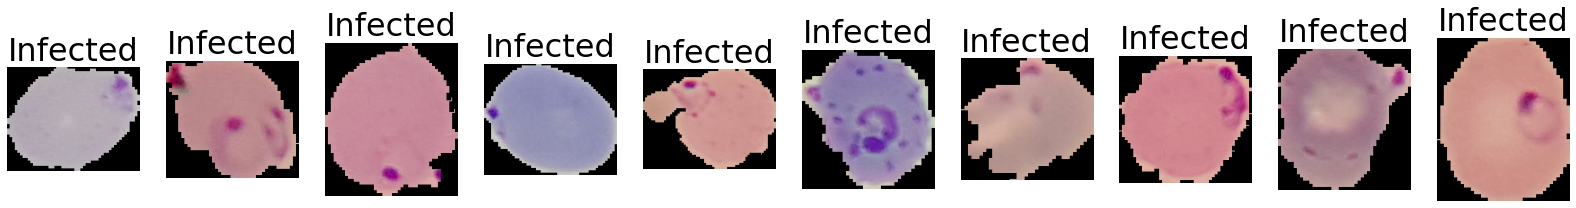

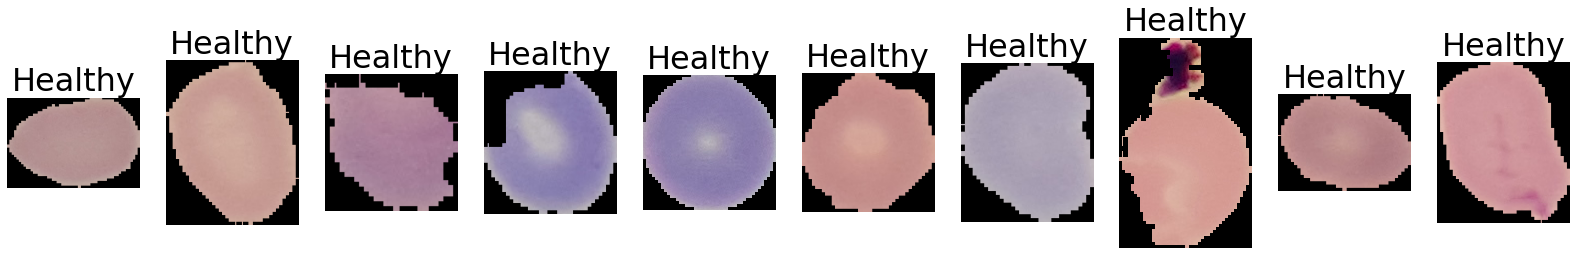

In [77]:
# Classifying each of the images from the dataset in 2 categories (Healthy and Infected) and displaying.

fig =plt.figure(figsize=(28,14))
columns=10
rows=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(mpimg.imread(infected_trn_samples[i-1]))
    plt.axis('off')
    plt.title('Infected', fontsize=32)
plt.show()


fig =plt.figure(figsize=(28,14))
columns=10
rows=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(mpimg.imread(healthy_trn_samples[i-1]))
    plt.axis('off')
    plt.title('Healthy', fontsize=32)
plt.show()

In [78]:
# Assigning the reshaping and rescaling values to our train and test dataset of images

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=0.4,
                                   vertical_flip=0.4,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [79]:
# Taking training dataset input in the variable with mentioning the proper parameters
train_generator = train_datagen.flow_from_directory('Dataset/Train',
                                                    batch_size=32,
                                                    target_size=(128,128),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42,
                                                    color_mode='rgb')

Found 27558 images belonging to 2 classes.


In [80]:
# Now using VGG19 model in our project to build our model 
base_model = VGG19(input_shape = (128,128,3),
                   include_top = False, 
                   weights = 'imagenet')
# Freeze the ConvNet to avoid weight updates
for layer in base_model.layers:
    layer.trainable=False
    
x = base_model.output
flat=Flatten()(x)

# Add a classifier -  a fully connected dense layers
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Bake a model
model_01 = Model(base_model.inputs, output)
model_01.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [81]:
model_01.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [82]:
# Taking testing dataset input in the variable with mentioning the proper parameters
test_generator = test_datagen.flow_from_directory('Dataset/Test',
                                                  batch_size=1,
                                                  target_size=(128, 128),
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  seed=42,
                                                  color_mode='rgb')

Found 134 images belonging to 2 classes.


In [83]:
# Fitting our model and training it.
history_01 = model_01.fit_generator(train_generator,
                                 epochs=10,
                                 validation_steps = len(test_generator))

C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
862/862 [==============================] - 2938s 3s/step - loss: 0.9977 - accuracy: 0.7294
Epoch 2/10
862/862 [==============================] - 3108s 4s/step - loss: 0.3884 - accuracy: 0.8292
Epoch 3/10
862/862 [==============================] - 2683s 3s/step - loss: 0.3754 - accuracy: 0.8342
Epoch 4/10
862/862 [==============================] - 3123s 4s/step - loss: 0.3641 - accuracy: 0.8374
Epoch 5/10
862/862 [==============================] - 3338s 4s/step - loss: 0.3663 - accuracy: 0.8379
Epoch 6/10
862/862 [==============================] - 3282s 4s/step - loss: 0.3516 - accuracy: 0.8422
Epoch 7/10
862/862 [==============================] - 4974s 6s/step - loss: 0.3575 - accuracy: 0.8451
Epoch 8/10
862/862 [==============================] - 2332s 3s/step - loss: 0.3469 - accuracy: 0.8507
Epoch 9/10
862/862 [==============================] - 2234s 3s/step - loss: 0.3553 - accuracy: 0.8468
Epoch 10/10
862/862 [==============================] - 2487s 3s/step - loss: 0.348

In [84]:
# Saving our created model for future use in Flask App.
from tensorflow.keras.models import load_model

model_01.save('malaria_model111.h5')

In [85]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [86]:
#Prediction of test set images and returning the indices of maximum values 
filenames = test_generator.filenames
nb_samples = len(filenames)
vgg_predictions_01 = model_01.predict_generator(test_generator,
                                                steps = nb_samples,
                                                verbose=1)
vgg_pred_labels_01= np.argmax(vgg_predictions_01, axis=1)

C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


134/134 [==============================] - 9s 66ms/step


In [87]:
# Printing the necessary report data like precision, recall, confusion matrix etc
print(classification_report(test_generator.classes, vgg_pred_labels_01, 
                            target_names=['healthy', 'infected']))
vgg_conf_mat_01 = pd.DataFrame(confusion_matrix(test_generator.classes, vgg_pred_labels_01), 
                        index=['healthy', 'infected'], 
                        columns=['healthy', 'infected'])

              precision    recall  f1-score   support

     healthy       1.00      0.81      0.90        91
    infected       0.72      1.00      0.83        43

    accuracy                           0.87       134
   macro avg       0.86      0.91      0.87       134
weighted avg       0.91      0.87      0.88       134



In [88]:
# Storing the test set images in the necessary variables
te_inf = glob('C:/Users/shiva/Documents/Project/Malaria-Detection-master/Dataset/Test/Parasite/*')
te_he = glob('C:/Users/shiva/Documents/Project/Malaria-Detection-master/Dataset/Test/Uninfected/*')

In [89]:
# Out of total test set images taking random 15 sample images
test_images = [img for img in random.sample(te_inf, 15)]
test_images.extend([img for img in random.sample(te_he, 15)])

In [90]:
# Generating labels to distinguish and predict which is infected cell and which is health cell.
class_labels = train_generator.class_indices
class_names = {value:key for (key, value) in class_labels.items()}

In [91]:
class_labels, class_names

({'Parasite': 0, 'Uninfected': 1}, {0: 'Parasite', 1: 'Uninfected'})

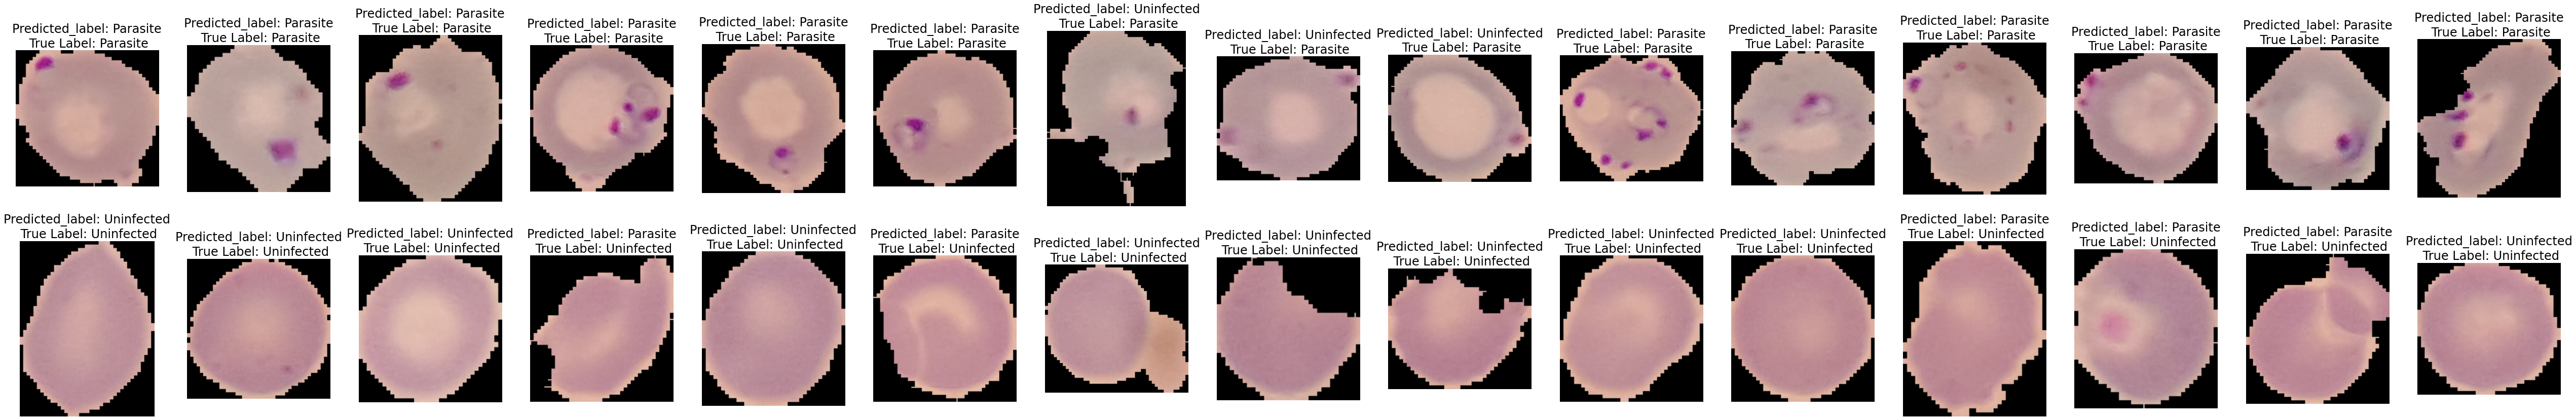

In [92]:
# Prection with displaying of the test set images with their actual and predicted labels
true_labels = []
predicted_labels = [] 
fig = plt.figure(figsize=(90,14))
columns=15
rows=2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    true_label = true_labels.append(test_images[i-1].split('\\')[0].split('/')[8])
    img = mpimg.imread(test_images[i-1])
    plt.imshow(img)
    plt.axis('off')
    img = image.load_img(test_images[i-1], target_size=(128,128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    prediction = model_01.predict(img)
    predicted_label = np.argmax(prediction)
    plt.title('Predicted_label: {}\n True Label: {}'.format(class_names[predicted_label], true_labels[i-1]), fontsize=24)
plt.show()

In [93]:
# Call backs
filepath = 'malaria_model111.h5'
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True,
                     save_weights_only=False, mode='auto', save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.0001)

# Define an optimizer
sgd = SGD(lr=.0001, decay=1e-6, momentum=0.9, nesterov=True)


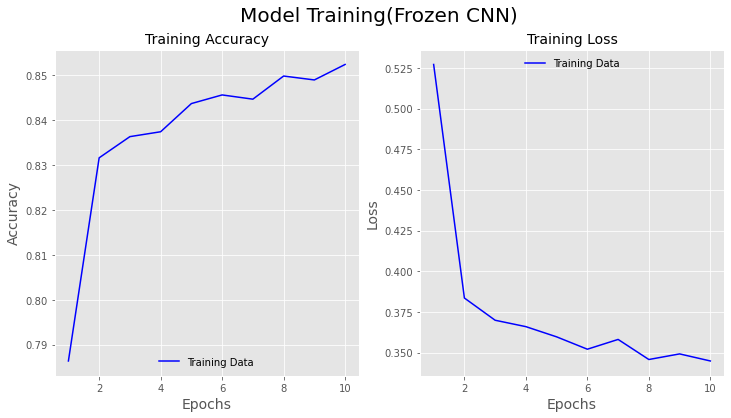

In [94]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training(Frozen CNN)", fontsize=20)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
#ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
#ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Loss', fontsize=14)
ax2.legend(frameon=False, loc='upper center', ncol=2)

In [95]:
vgg_test_eval_01 = model_01.evaluate_generator(test_generator)

C:\Users\shiva\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


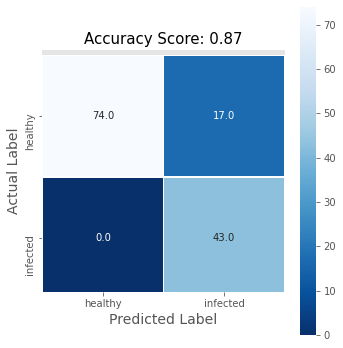

In [96]:
fig, ax = plt.subplots(figsize=(5,5))
#plt.figure(figsize=(9,9))
sns.heatmap(vgg_conf_mat_01, annot=True, fmt=".1f", linewidths=0.5, square=True, cmap='Blues_r')
ax.set_ylabel("Actual Label", fontsize=14)
ax.set_xlabel("Predicted Label", fontsize=14)
all_sample_title="Accuracy Score: {0:.2f}".format(vgg_test_eval_01[1])
ax.set_title(all_sample_title, size=15)
ax.set_ylim(len(vgg_conf_mat_01)-0.05, -0.05)
plt.tight_layout()